In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# 큐브 이미지를 읽어서 HSV로 변환
img = cv2.imread('./img/cube.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [26]:
# 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255, 255])
green1 = np.array([45, 50, 50])
green2 = np.array([75, 255, 255])
red1 = np.array([0, 50, 50])
red2 = np.array([15, 255, 255])
red3 = np.array([165, 50, 50])
red4 = np.array([180, 255, 255])
yellow1 = np.array([20, 50, 50])
yellow2 = np.array([35, 255, 255])

In [27]:
# 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red1 = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

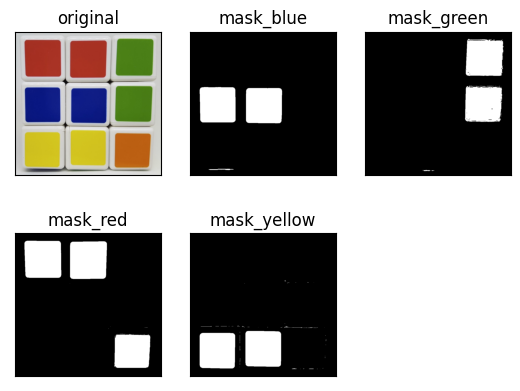

In [32]:
imgs = {'original':img, 'mask_blue':mask_blue, 'mask_green':mask_green,
       'mask_red':mask_red, 'mask_yellow':mask_yellow}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 3, i+1)
    plt.title(k)
    if len(v.shape) == 2:
        plt.imshow(v, cmap='gray')
    else:
        plt.imshow(v[:, :, ::-1])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [22]:
# 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

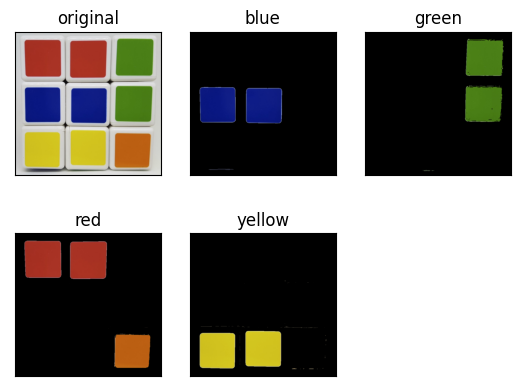

In [23]:
imgs = {'original':img, 'blue':res_blue, 'green':res_green,
       'red':res_red, 'yellow':res_yellow}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 3, i+1)
    plt.title(k)
    plt.imshow(v[:, :, ::-1])
    plt.xticks([])
    plt.yticks([])
    
plt.show()